<a href="https://colab.research.google.com/github/shreejitp/Regression_problems/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Analysis** using BIG MART SALES DATA

References -

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/



In [ ]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:

from sklearn.model_selection import train_test_split
#import test and train file


In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [ ]:
train[:1]# the rows are indexed 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
#train.columns

#Checking the datatypes for the train dataset 
# Item_Outlet_Sales is the dependent variable 


# Some of the features are float64 while others are object 
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#splitting into training and cv for cross validation ---- Creating a Training - Validation SPLIT 
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales) # Features first train and v, target variable 

#training the model
lreg.fit(x_train,y_train)
#predicting on cv
pred = lreg.predict(x_cv)
#calculating mse
mse = np.mean((pred - y_cv)**2)

In [ ]:
#x_train.head() # features for test  
#x_cv.head()    # features for Validation
#y_train         # DV for train 
pred  # array of predicted values in the validation set 

array([1282.43937523, 1378.91771971, 3392.72871343, ..., 2480.30124211,
       3111.1538425 , 2383.32216466])

In [ ]:
mse

1977053.6197641385

In [ ]:
#Calculating coefficients from the Linear model
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.701946
1,Item_MRP,15.531534


In [ ]:
#Calculating R square and Adjusted R square for the model 
lreg.score(x_cv,y_cv)

0.31581360022101646

In [ ]:
###################################################
# getting adjusted R square: https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared
# For adjusted R square, you need a formula: uses 
##################################################
x_cv.shape[1]  # Number of features used 
len(y_cv)     # Number of samples used 

2131

In [ ]:
#R square and adjusted R square 
# compute with formulas from the theory
SS_Residual = sum((y_cv-pred)**2)       
SS_Total = sum((y_cv-np.mean(y_cv))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_cv)-1)/(len(y_cv)-x_cv.shape[1]-1)
print(r_squared,adjusted_r_squared)


0.315813600221018 0.31517056789039866


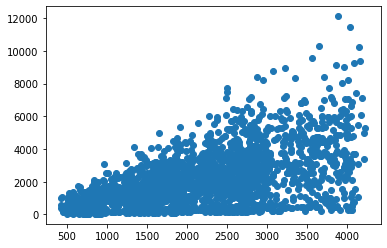

In [ ]:
#Plotting predicts vs actuals on validation data 
import matplotlib.pyplot as plt
plt.scatter(pred,y_cv)

R² is 32%, meaning, only 32% of variance in sales is explained by year of establishment and MRP. In other words, if you know year of establishment and the MRP, you’ll have 32% information to make an accurate prediction about its sales

# Model 4 – Linear regression with more variables

In [ ]:
#Introducing one more variable 
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
lreg.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype(‘float64’).

**It produces an error, because item weights column have some missing values. So let us impute it with the mean of other non-null entries.**

In [ ]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True) # Imputing NULL values with Average Item Height 
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

1871965.8996577307

# Using all the features for prediction

**Data Preprocessing for regression model** 

It is always good to take a look at the distinct values by column types


In [ ]:
train = pd.read_csv('/content/Train.csv') # Initializing train data 
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values

mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix= mylist)    #Getting only dummy encoded variables # Do you have any ordinal variables? 
train.drop(mylist, axis=1, inplace = True)
X = pd.concat([train,dummies], axis =1 )                   # Concat dummy encoded and Numerical variables 

In [ ]:
X.head() # contains the dependent variable 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,15,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,26,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
# Lets get all columns with null values 
X.columns[X.isna().any()].tolist()

[]

In [ ]:
#X.drop('Item_Outlet_Sales',1)
train.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**Building the model**

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# importing linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X=X.drop('Item_Outlet_Sales',1) # Dropping the dependent variable altogether 
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
lreg.fit(x_train,y_train)

# predicting on cv
pred_cv = lreg.predict(x_cv)

# calculating mse
mse = np.mean((pred_cv - y_cv)**2)
mse

4.6187677123502715e+23

In [ ]:
lreg.score(x_cv,y_cv)

#turns out to be a terrible model 

-1.5374144058462694e+17

In [ ]:
#Calculating coefficients from the Linear model
# As you can see, there are way too many coefficients 
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,3.394443e+00
1,Item_Visibility,6.623069e+02
2,Item_MRP,1.995789e+00
3,Outlet_Establishment_Year,2.020155e+12
4,Item_Identifier_DRA12,-5.221240e+11
...,...,...
1599,Outlet_Location_Type_Tier 3,-1.053317e+12
1600,Outlet_Type_Grocery Store,-1.462515e+13
1601,Outlet_Type_Supermarket Type1,6.436901e+11
1602,Outlet_Type_Supermarket Type2,7.136502e+12


In [ ]:
# checking the magnitude of coefficients
# IT is expected to give us a crazy plot because of so many variables 
predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

We may have to use regularization to shrink some of the coefficients 

# **Ridge Regression** 

In [ ]:
#Starting with a random value for Alpha ## 

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True) # Giving a value of alpha=0.05 # Remember you have to minimize --> alpha(slope*slope) for ridge 
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
ridgeReg.score(x_cv,y_cv)

0.4284069282405669

In [ ]:
# with a different value of alpha 
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.10, normalize=True) # Giving a value of alpha=0.05 # Remember you have to minimize --> alpha(slope*slope) for ridge 
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
ridgeReg.score(x_cv,y_cv)

0.4379553829083941

You can do a GridSearch or Randomized Search or Halving Approaches of the two

**Lasso Regression** 

In [ ]:
#Straightaway LASSO is doing a lot better 
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
lassoReg.score(x_cv,y_cv)

0.5404506329665002

In [ ]:
lassoReg.coef_

array([   0.        ,   -0.        ,   14.7800513 , ...,    0.        ,
       -136.32841302,    0.        ])

In [ ]:
# Again a lot of variables were considered and the graphs going to look pretty bad 
predictors = x_train.columns
coef = Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

# **Elastic Net Regression**

Elastic Net is a combination of Ridge and Lasso 

In [ ]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

#calculating mse
mse = np.mean((pred_cv - y_cv)**2)
ENreg.score(x_cv,y_cv)


0.4538645196926594

# Need to focus on 
- EDA 
- Feature Engineering 
- Hyperparameter Tuning in Regularization 
- Non Linear Models/ Other algorithms 